In [1]:
from qiskit.quantum_info import Statevector, Operator, partial_trace
from qiskit import QuantumCircuit
import numpy as np
from numpy import sqrt
from IPython.display import display, Latex, Math

from qiskit import __version__
print(__version__)

2.2.3


In [2]:
# Define commononly used statevectors
zero = Statevector(np.array([[1], [0]]))
one = Statevector(np.array([[0], [1]]))

plus = Statevector.from_label("+")
minus = Statevector.from_label("-")

plus_im = Statevector.from_label("r")
minus_im = Statevector.from_label("l")

# Define commonly used operators
H = Operator.from_label("H")
Id = Operator.from_label("I")
X = Operator.from_label("X")
CX = Operator([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

### 🔵 1. Identify which of the following 2-qubit states are entanghled:

a.  $\frac{1}{\sqrt{2}}\big(\ket{00} + \ket{11}\big)$

b.  $\frac{1}{\sqrt{2}}\big(\ket{00} + \ket{01}\big)$

c.  $\ket{+}\otimes\ket{0}$

d.  $\frac{1}{\sqrt{3}}\big(\ket{01}+\ket{10}+\ket{11}\big)$

In [3]:
# Import helper function
import sys
import os

# Add the repo root to Python path
repo_root = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(repo_root)

from utils.separability_checks import (
    is_separable,
    print_partition_classification,
    print_partition_schmidt,
    classify_all_bipartitions,
    visualize_all_bipartitions
)

In [4]:
# Part a
HoI = H.tensor(Id) 
# Compose CX with HoI so the resulting operator acts on the same 2-qubit system.
# Using tensor here created a 4-qubit operator and caused the dimension mismatch.
CXoHoI = CX @ HoI  # apply HoI first, then CX

zero_o_zero = zero.tensor(zero)

state_a = zero_o_zero.evolve(CXoHoI)
print(f'State a:')
display(state_a.draw('latex'))

print_partition_classification(state_a, 1)    # compute Schmidt rank of corresponding 'qubit matrix' and print result

State a:


<IPython.core.display.Latex object>

Partition 1 | 1: entangled 💞


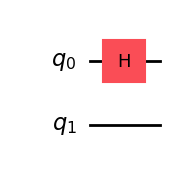

State b:


<IPython.core.display.Latex object>

Partition 1 | 1: separable 💕


In [9]:
# Part b
qc_b = QuantumCircuit(2)
qc_b.h(0)
display(qc_b.draw('mpl'))

state_b = (zero ^ zero).evolve(qc_b)


print(f'State b:')
display(state_b.draw('latex'))
print_partition_classification(state_b, 1)

In [11]:
state_c = zero.tensor(plus)
print(f'State c:')
display(state_c.draw('latex'))
print_partition_classification(state_c, 1)

State c:


<IPython.core.display.Latex object>

Partition 1 | 1: separable 💕


In [13]:
state_d = (np.kron(zero.data, one.data)
           + np.kron(one.data, zero.data)
           + np.kron(one.data, one.data)) / np.sqrt(3)

state_d = Statevector(state_d)
print(f"State d:")
display(state_d.draw('latex'))
print_partition_classification(state_d,1)

State d:


<IPython.core.display.Latex object>

Partition 1 | 1: entangled 💞
